# Week 3 Homework

Utilize the scikit-learn California Housing dataset for the following exercise  
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing

In [84]:
# Importing

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import postgresql
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Normalizer
from sklearn.metrics import mean_absolute_error


## 1. Download the dataset and build DataFrames for X and y

In [18]:
# # data = sklearn.datasets.fetch_california_housing()
# from sklearn.datasets.california_housing import fetch_california_housing
# fetch_california_housing()
# df = fetch_california_housing()
# df.data
# df.target

# df.feature_names
# type(df)

from sklearn.datasets.california_housing import fetch_california_housing

df = fetch_california_housing()

df = pd.DataFrame(df.data, columns=df.feature_names)



In [20]:
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24


In [21]:
df.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object

## 2. Are there columns that look like they need a type change?

In [22]:
for column in df.columns:
    if df[column].dtype == type(np.float64):
        le = sklearn.preprocessing.LabelEncoder()
        df[column] = le.fit_transform(df[column])
        df[column] = df[column].astype(np.int)

In [23]:
for column in df.columns:
    df[column] = df[column].astype(np.int64)

In [24]:
df.dtypes

MedInc        int64
HouseAge      int64
AveRooms      int64
AveBedrms     int64
Population    int64
AveOccup      int64
Latitude      int64
Longitude     int64
dtype: object

In [25]:
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20635,1,25,5,1,845,2,39,-121
20636,2,18,6,1,356,3,39,-121
20637,1,17,5,1,1007,2,39,-121
20638,1,18,5,1,741,2,39,-121
20639,2,16,5,1,1387,2,39,-121


## Split your data into training and testing datasets

In [26]:
x_df = df.drop(columns='MedInc')
y_df = df['MedInc']

X_train, X_test, y_train, y_test = train_test_split(x_df, y_df)

X_train.head()


,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7842,32,3,0,1888,5,33,-118
15558,12,4,1,1251,2,33,-117
9963,38,6,1,823,2,38,-122
9187,2,9,1,1787,2,34,-118
10854,4,3,1,983,1,33,-117


In [27]:
y_train.head()

7842     3
15558    2
9963     6
9187     6
10854    3
Name: MedInc, dtype: int64

## 3. Build a K-NN Regressor and fit it

In [28]:
clf = KNeighborsClassifier(n_neighbors = 3)

clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [29]:
clf.predict(X_test)

array([2, 3, 2, ..., 1, 3, 2], dtype=int64)

## 4. Try several different parameter values, especially for number of neighbors.  Keep the optimal result that you encounter while testing.

In [72]:
clf = KNeighborsClassifier(n_neighbors = 9)

clf.fit(X_train, y_train)
result = clf.predict(X_test)
result = pd.Series(result)

## 5. Split your data into training and testing datasets

In [31]:
# Done with it in above cells

## 6. Determing model accuracy or efficacy is slightly harder with a regression.  What is your mean absolute error from the model?

In [82]:
mean_absolute_error(y_test, result)

1.6060077519379845

## 7. Chart your predictions vs the actuals.

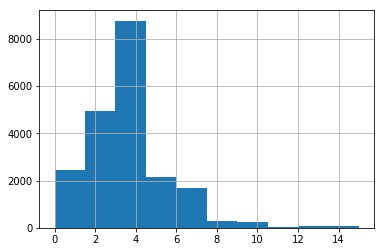

In [57]:
y_df.hist()

<BarContainer object of 5160 artists>

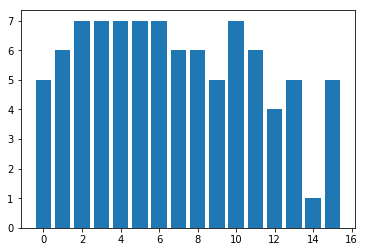

In [88]:
plt.bar(y_test, result)  

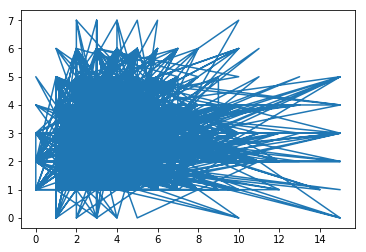

In [92]:
plt.plot(y_test, result)